In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.1f}'.format

data_path='/home/franknitty/irs_nyc_migration/data'
#data_path='/Users/anastasiaclark/irs_nyc_migration/data'

colors=['#a6cee3','#1f78b4','#b2df8a','#33a02c'] # these 4 colors are printer & color-blind safe
colors2=['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']# these 5 colors are printer-safe
cbrew=['#f1a340','#f7f7f7','#998ec3']
cbrew2=['#fc8d59','#ffffbf','#99d594']

# alterntatively, we can fill bars with pattherns so they all look different on b & w paper
patterns = [ "//" , "\\\\" ,"xx", "+", "|" , "-" ,"o", "O", ".", "*" ]

nyc=['36005','36047','36061','36081','36085']
nymet=['35620']

cities={'06037':'Los Angeles Co, CA','17031': 'Cook Co, IL (Chicago)','48201': 'Harris Co, TX (Houston)',
   '04013': 'Maricopa Co, AZ (Phoenix)','42101': 'Philadelphia Co, PA', '48029': 'Bexar Co, TX (San Antonio)', '06073': 'San Diego Co, CA',
  '48113': 'Dallas Co, TX', '06085': 'Santa Clara Co, CA (San Jose)','36005':'New York City, NY','36047':'New York City, NY',
       '36061':'New York City, NY','36081':'New York City, NY','36085':'New York City, NY'}

# cities={'06037':'Los Angeles, CA','17031': 'Chicago, IL','48201': 'Houston, TX',
  # '04013': 'Phoenix, AZ','42101': 'Philadelphia, PA', '48029': 'San Antonio, TX', '06073': 'San Diego, CA',
  #'48113': 'Dallas, TX', '06085': 'San Jose, CA','36005':'New York City, NY','36047':'New York City, NY',
   #    '36061':'New York City, NY','36081':'New York City, NY','36085':'New York City, NY'}

metros=['35620','31080','16980','19100','26420','47900','37980','33100','12060','14460','41860','38060','40140','19820']

years=['2011','2012','2013','2014','2015', '2016']

metro_pep=pd.read_csv(os.path.join(data_path, 'census_pop_est','cbsa-est2016-modified.csv'),converters={'CBSA':str})
county_pep=pd.read_csv(os.path.join(data_path, 'census_pop_est','co-est2016-alldata.csv'), converters={'STATE':str,'COUNTY':str},encoding='LATIN-1')

/home/franknitty/.local/lib/python3.5/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
metro_pep.set_index('CBSA', inplace=True)
metro_pep.head()

,NAME,LSAD,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,...,NETMIG2014,NETMIG2015,NETMIG2016,RESIDUAL2010,RESIDUAL2011,RESIDUAL2012,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,RESIDUAL2016
CBSA,,,,,,,,,,,,,,,,,,,,,
10100,"Aberdeen, SD",Micropolitan Statistical Area,40602,40602,40723,41038,41624,42290,42450,42708,...,48,148,253,1,-12,11,-16,-3,-20,-23
10140,"Aberdeen, WA",Micropolitan Statistical Area,72797,72804,72863,72349,71746,70989,70779,71023,...,-106,256,661,-1,-8,6,-52,-48,42,12
10180,"Abilene, TX",Metropolitan Statistical Area,165252,165252,165603,166651,167540,167609,168465,169893,...,120,733,-218,0,24,2,54,-51,-13,-1
10220,"Ada, OK",Micropolitan Statistical Area,37492,37492,37602,37714,38039,38165,38263,38268,...,-42,-50,76,-3,-12,1,15,-25,23,-19
10300,"Adrian, MI",Micropolitan Statistical Area,99892,99892,99635,99302,98994,98784,98696,98389,...,-141,-385,139,21,-45,11,-4,-33,44,-76


In [3]:
# county pep needs unique FIPS
county_pep.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016
0,40,3,6,01,000,Alabama,Alabama,4779736,4780131,4785492,...,0.3,0.1,-0.6,-0.2,0.7,1.1,1.2,1.1,0.4,0.8
1,50,3,6,01,001,Alabama,Autauga County,54571,54571,54742,...,-4.6,2.1,-2.8,4.1,6.2,-5.3,-4.6,2.3,-2.7,4.3
2,50,3,6,01,003,Alabama,Baldwin County,182265,182265,183199,...,21.7,19.0,17.3,19.6,15.8,18.6,22.8,20.2,18.6,20.8
3,50,3,6,01,005,Alabama,Barbour County,27457,27457,27348,...,-7.0,-4.2,-16.6,-9.5,-1.3,-7.4,-7.4,-4.5,-16.8,-9.7
4,50,3,6,01,007,Alabama,Bibb County,22915,22919,22861,...,-6.6,0.1,0.1,1.5,-5.0,-4.3,-6.0,0.9,0.9,2.3


In [4]:
county_pep['fips']=county_pep.STATE+county_pep.COUNTY
county_pep.set_index('fips',inplace=True)

In [5]:
# most columns are the same in county and metro pep dataset
# however, one column, NPOPCNHG has an underscore in county pep
# remove the udnderscore to make columns of interest be same in both datasets
col_names=[c.replace('_','') for c in county_pep.columns]
county_pep.columns=col_names

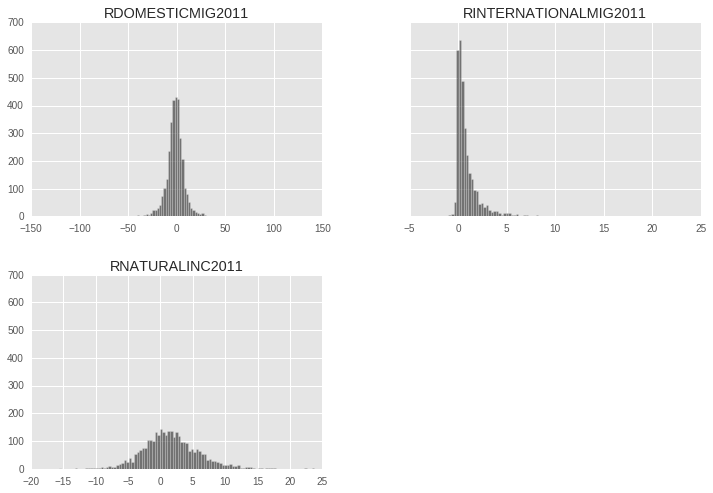

                  CTYNAME        STNAME  REGION  DIVISION  RDOMESTICMIG2011
fips                                                                       
48301       Loving County         Texas       3         7             101.1
38053     McKenzie County  North Dakota       2         4              82.7
49009      Daggett County          Utah       4         8              73.1
38105     Williams County  North Dakota       2         4              69.9
38007     Billings County  North Dakota       2         4              69.6
22087  St. Bernard Parish     Louisiana       3         7              58.2
30033     Garfield County       Montana       4         8              57.7
38025         Dunn County  North Dakota       2         4              49.1
35021      Harding County    New Mexico       4         8              45.8
31171       Thomas County      Nebraska       2         4              44.8


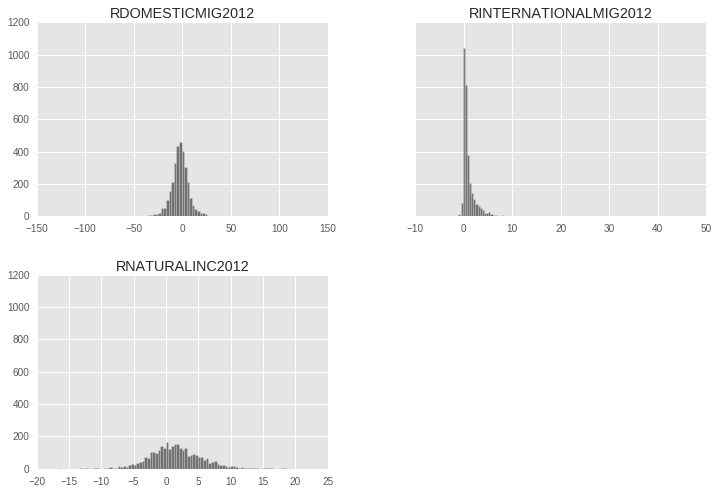

                CTYNAME        STNAME  REGION  DIVISION  RDOMESTICMIG2012
fips                                                                     
38053   McKenzie County  North Dakota       2         4             119.5
13165    Jenkins County       Georgia       3         5             114.6
38105   Williams County  North Dakota       2         4              80.6
30109     Wibaux County       Montana       4         8              73.4
38007   Billings County  North Dakota       2         4              69.6
38061  Mountrail County  North Dakota       2         4              65.2
30083   Richland County       Montana       4         8              58.1
38089      Stark County  North Dakota       2         4              55.6
12119     Sumter County       Florida       3         5              51.2
38025       Dunn County  North Dakota       2         4              50.0


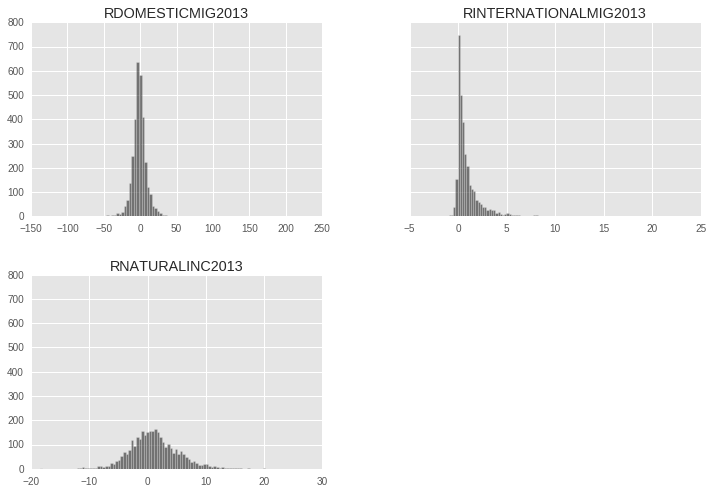

                CTYNAME        STNAME  REGION  DIVISION  RDOMESTICMIG2013
fips                                                                     
48301     Loving County         Texas       3         7             239.1
38053   McKenzie County  North Dakota       2         4             138.2
38105   Williams County  North Dakota       2         4              93.8
32009  Esmeralda County        Nevada       4         8              92.4
47007    Bledsoe County     Tennessee       3         6              73.0
12119     Sumter County       Florida       3         5              73.0
30109     Wibaux County       Montana       4         8              59.6
38061  Mountrail County  North Dakota       2         4              56.5
48311   McMullen County         Texas       3         7              53.4
38013      Burke County  North Dakota       2         4              49.5


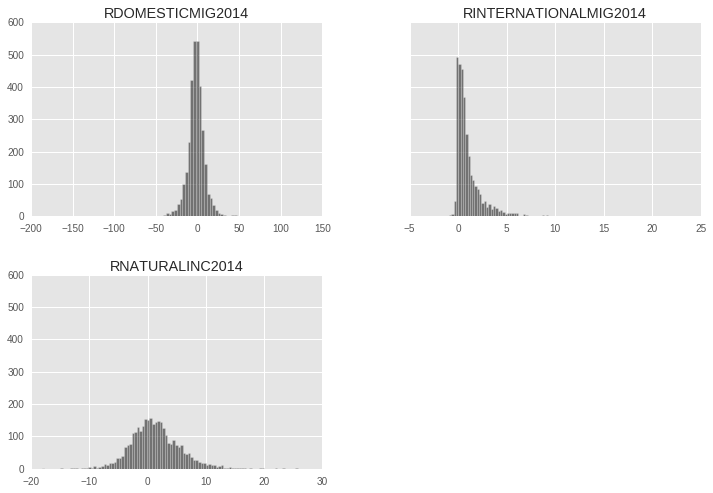

               CTYNAME        STNAME  REGION  DIVISION  RDOMESTICMIG2014
fips                                                                    
38053  McKenzie County  North Dakota       2         4             149.0
48431  Sterling County         Texas       3         7              80.9
38105  Williams County  North Dakota       2         4              67.4
38089     Stark County  North Dakota       2         4              57.4
08025   Crowley County      Colorado       4         8              48.8
47007   Bledsoe County     Tennessee       3         6              47.3
01107   Pickens County       Alabama       3         6              47.2
12119    Sumter County       Florida       3         5              46.1
31009    Blaine County      Nebraska       2         4              44.6
13259   Stewart County       Georgia       3         5              41.9


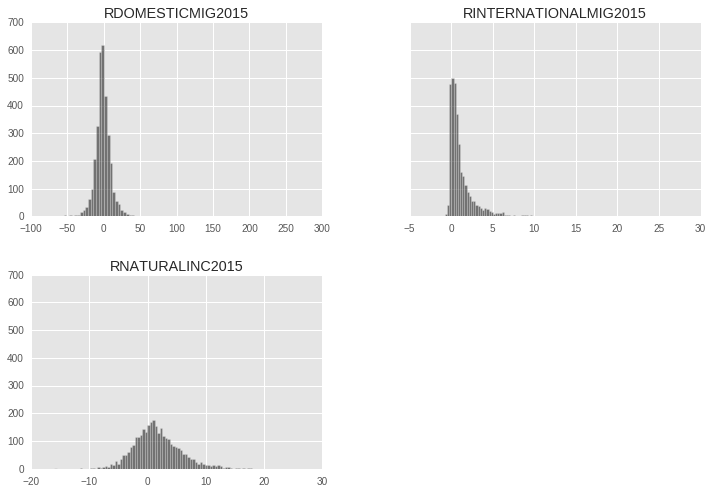

                 CTYNAME        STNAME  REGION  DIVISION  RDOMESTICMIG2015
fips                                                                      
48301      Loving County         Texas       3         7             287.1
38053    McKenzie County  North Dakota       2         4             135.0
48269        King County         Texas       3         7              83.8
38105    Williams County  North Dakota       2         4              80.1
12119      Sumter County       Florida       3         5              61.6
31007      Banner County      Nebraska       2         4              59.4
08079     Mineral County      Colorado       4         8              48.0
38061   Mountrail County  North Dakota       2         4              47.8
48229    Hudspeth County         Texas       3         7              44.4
08014  Broomfield County      Colorado       4         8              42.5


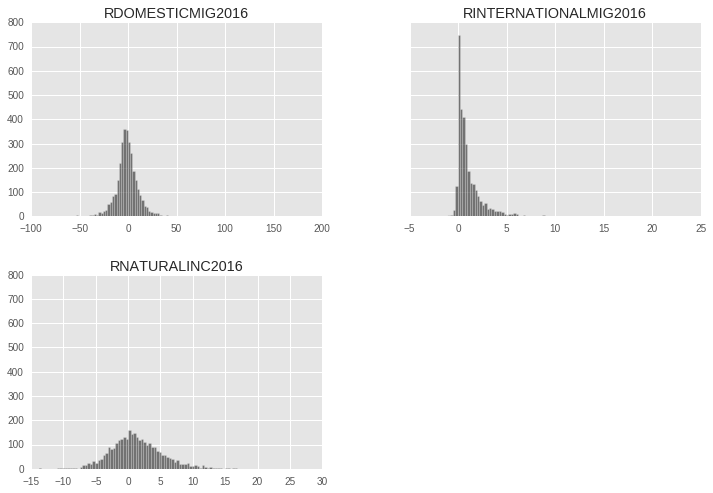

               CTYNAME    STNAME  REGION  DIVISION  RDOMESTICMIG2016
fips                                                                
48229  Hudspeth County     Texas       3         7             153.2
49037  San Juan County      Utah       4         8              63.7
48259   Kendall County     Texas       3         7              44.4
08027    Custer County  Colorado       4         8              43.0
30039   Granite County   Montana       4         8              40.9
08091     Ouray County  Colorado       4         8              40.1
12119    Sumter County   Florida       3         5              40.1
41013     Crook County    Oregon       4         9              40.1
08023  Costilla County  Colorado       4         8              39.8
48209      Hays County     Texas       3         7              39.8


In [6]:
# for each period year, plot distributions of the rates for natural increase, net domestic migration and net international migration
# and print 10 top counties with the highest domestic migration rate
for year in years:
    county_pep[['RNATURALINC{}'.format(year),'RDOMESTICMIG{}'.format(year),'RINTERNATIONALMIG{}'.format(year)]].hist(color='k', alpha=0.5, figsize=(12,8), bins=100,sharey=True)
    plt.show()
    print (county_pep[['CTYNAME','STNAME','REGION','DIVISION','RDOMESTICMIG{}'.format(year)]].sort_values('RDOMESTICMIG{}'.format(year),ascending=False).head(n=10))

In [7]:
# create lists of columns that will be used in analysis
pop_change=[c for c in county_pep.columns if c.startswith('NPOPCHG')]
nat_inc=[c for c in county_pep.columns if c.startswith('NATURALINC')]
net_int=[c for c in county_pep.columns if c.startswith('INTERNATIONALMIG')]
net_dom=[c for c in county_pep.columns if c.startswith('DOMESTICMIG')]

# 2010 census and 2016 estimates are used to calculate pct_pop_change
keep_cols=pop_change+nat_inc+net_int+net_dom

In [8]:
# Create keeper list of counties, fold April-July change into the change between 2010 and 2011
all_counties=county_pep[keep_cols].copy()

all_counties['NPOPCHG2011']=all_counties['NPOPCHG2011']+all_counties['NPOPCHG2010']
all_counties['NATURALINC2011']=all_counties['NATURALINC2011']+all_counties['NATURALINC2010']
all_counties['INTERNATIONALMIG2011']=all_counties['INTERNATIONALMIG2011']+all_counties['INTERNATIONALMIG2010']
all_counties['DOMESTICMIG2011']=all_counties['DOMESTICMIG2011']+all_counties['DOMESTICMIG2010']
all_counties.drop(['NPOPCHG2010','NATURALINC2010','INTERNATIONALMIG2010','DOMESTICMIG2010'],
                  axis=1,inplace=True)

In [9]:
#Create subset of NYC counties
nyc_est=all_counties.loc[nyc]
nyc_est

,NPOPCHG2011,NPOPCHG2012,NPOPCHG2013,NPOPCHG2014,NPOPCHG2015,NPOPCHG2016,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,...,INTERNATIONALMIG2013,INTERNATIONALMIG2014,INTERNATIONALMIG2015,INTERNATIONALMIG2016,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,DOMESTICMIG2015,DOMESTICMIG2016
fips,,,,,,,,,,,,,,,,,,,,,
36005,14883,14784,11776,11137,11509,6524,16468,12789,12132,12128,...,14813,16643,17308,17198,-21175,-13389,-14171,-18051,-16181,-20956
36047,38961,28615,23062,17200,12397,4209,32691,26419,26484,25921,...,20244,22383,23318,22955,-21199,-17858,-21175,-32526,-33042,-43264
36061,23659,15588,5332,4015,6700,2566,12363,9965,9118,8447,...,15122,16715,17422,17217,-6062,-9030,-16750,-22309,-16103,-21557
36081,29211,18268,19574,16551,13079,5826,21169,16297,16423,16271,...,23229,25699,26697,26295,-21716,-21324,-17387,-26537,-25746,-35335
36085,2422,-174,1537,627,827,2046,2961,2213,1724,1835,...,1187,1314,1394,1356,-1900,-3684,-1139,-2324,-1824,-299


In [10]:
# Create keeper list of metros, fold April-July change into the change between 2010 and 2011
keep_cols.append('NAME')
all_metros=metro_pep[keep_cols].copy()

all_metros['NPOPCHG2011']=all_metros['NPOPCHG2011']+all_metros['NPOPCHG2010']
all_metros['NATURALINC2011']=all_metros['NATURALINC2011']+all_metros['NATURALINC2010']
all_metros['INTERNATIONALMIG2011']=all_metros['INTERNATIONALMIG2011']+all_metros['INTERNATIONALMIG2010']
all_metros['DOMESTICMIG2011']=all_metros['DOMESTICMIG2011']+all_metros['DOMESTICMIG2010']
all_metros.drop(['NPOPCHG2010','NATURALINC2010','INTERNATIONALMIG2010','DOMESTICMIG2010'], axis=1, inplace=True)

In [11]:
#create subset for NY Metro
ny_metro=all_metros[metro_pep.NAME.str.contains('New York')].copy()
ny_metro

,NPOPCHG2011,NPOPCHG2012,NPOPCHG2013,NPOPCHG2014,NPOPCHG2015,NPOPCHG2016,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,...,INTERNATIONALMIG2014,INTERNATIONALMIG2015,INTERNATIONALMIG2016,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,DOMESTICMIG2015,DOMESTICMIG2016,NAME
CBSA,,,,,,,,,,,,,,,,,,,,,
35620,184705,113258,104411,83389,65829,35571,145847,113773,106624,108950,...,139938,145777,143731,-123396,-128006,-115765,-168503,-166950,-199996,"New York-Newark-Jersey City, NY-NJ-PA"


In [12]:
# sum counties records to represent a single NYC record
city=nyc_est.sum(axis=0)

In [13]:
# function to reshape the data: make a row for each year of data
def reshape_dataset(df):
    # list to hold temporary dfs while reshaping
    dfs=[]
    for year in years:
        ixs=[i for i in df.index if year in i]
        yr=df.loc[ixs].reset_index().T
        yr.columns=yr.iloc[0]
        yr.drop(yr.index[0], inplace=True)
        yr.index=[year]
        # strip the year out of the column
        new_names=[n[0:len(n)-4].strip('_') for n in yr.columns]
        # assign new column names for a single year row
        yr.columns=new_names
        # append single year of data to the list 
        dfs.append(yr)
    # concatenate all the years
    reshaped=pd.concat(dfs)
    return reshaped

In [79]:
# function to plot the dataset as stacked bar chart
def plot_pop_change(df, title, colors, use_hatch=False):
    leg_names=['Population Change','Net Domestic Migration','Net International Migration','Natural Increase']
    ax=df['NPOPCHG'].plot(x='NPOPCHG', linestyle='-', marker='o')
    # this iF part only for b & w printing--will add hatches to bars
    if use_hatch:
        df[['DOMESTICMIG','INTERNATIONALMIG','NATURALINC']].plot(kind='bar',ax=ax, stacked=True, figsize=(8,5),legend=False,color=colors[:3], rot=0)
        bars = ax.patches
        for i, bar in enumerate(bars):
            if i<6:
                bar.set_hatch(patterns[0])
            elif i>5 and i<12:
                bar.set_hatch(patterns[1])
            elif i>11:
                bar.set_hatch(patterns[2])            
    else:  
        df[['DOMESTICMIG','INTERNATIONALMIG','NATURALINC']].plot(kind='bar',ax=ax, stacked=True, figsize=(8,5),legend=False,color=colors[:3],rot=0)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    lgd=plt.legend(leg_names, loc=8,bbox_to_anchor=(0.5, -0.2), ncol=4,prop = {'size':12.5},frameon=False)
    ax.set_title(title)
    plt.show()

In [80]:
# reshape the data for NYC
df1=reshape_dataset(city) 
df1

,NPOPCHG,NATURALINC,INTERNATIONALMIG,DOMESTICMIG
2011,109136,85652,94899,-72052
2012,77081,67683,76138,-65285
2013,61281,65881,74595,-70622
2014,49530,64602,82754,-101747
2015,44512,60631,86139,-92896
2016,21171,57494,85021,-121411


In [81]:
df1.NPOPCHG.sum()
# table NYC2017a shows 362540 -in my summary at the bottom, if I subtract total 2016 estimates from 2010 Census I get 362540
# But when we sum the NPOPCHG columns for each year we get a slightly bigger number
# NYC2017a has footnote that says sums may not match totals due to small adjustments

362711

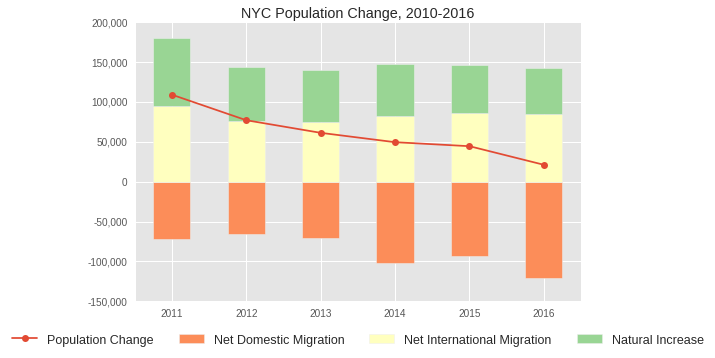

In [82]:
plot_pop_change(df1, 'NYC Population Change, 2010-2016', cbrew2)

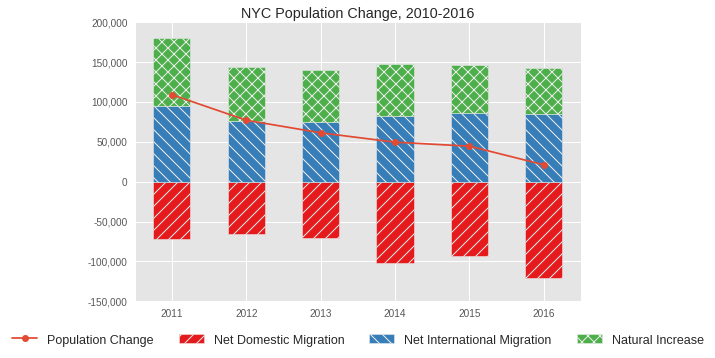

In [18]:
# or alternative bars filled with hatches
plot_pop_change(df1, 'NYC Population Change, 2010-2016', colors2, use_hatch=True) 

In [19]:
# reshape the data for New York metro
df2=reshape_dataset(ny_metro.T) 
df2

,NPOPCHG,NATURALINC,INTERNATIONALMIG,DOMESTICMIG
2011,184705,145847,163690,-123396
2012,113258,113773,129274,-128006
2013,104411,106624,126294,-115765
2014,83389,108950,139938,-168503
2015,65829,101803,145777,-166950
2016,35571,94720,143731,-199996


In [20]:
# Similar discrepancy here. Summing NPOPCHG yields 587,163. But subtracting total 2016 estimate from 2010 Census
# in table at bottom yields 586,224

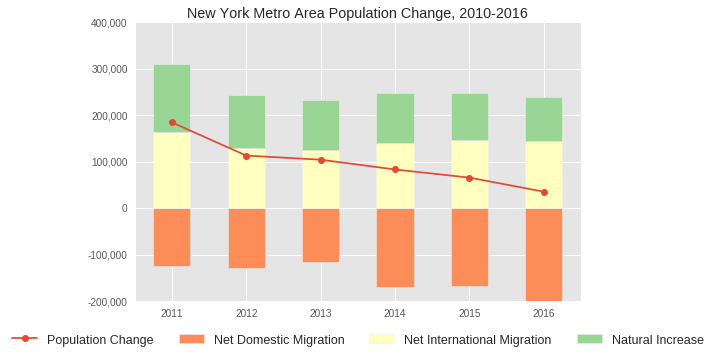

In [21]:
plot_pop_change(df2, 'New York Metro Area Population Change, 2010-2016', cbrew2) 

In [22]:
df1.sum()

NPOPCHG             362,711.0
NATURALINC          401,943.0
INTERNATIONALMIG    499,546.0
DOMESTICMIG        -524,013.0
dtype: float64

In [53]:
#Million lines of code to create summary table
nyc_popsummary=county_pep.loc[nyc][['CENSUS2010POP','POPESTIMATE2016']]
nyc_popsummary['label']='New York City'
nyc_popsummary=nyc_popsummary.groupby(['label']).sum().reset_index()
nyc_popsummary['natincrease']=df1.NATURALINC.sum()
nyc_popsummary['foreign']=df1.INTERNATIONALMIG.sum()
nyc_popsummary['domestic']=df1.DOMESTICMIG.sum()
nyc_popsummary['change']=(nyc_popsummary.POPESTIMATE2016 - nyc_popsummary.CENSUS2010POP)
nyc_popsummary['pct_change']=((nyc_popsummary.change / nyc_popsummary.CENSUS2010POP) *100).round(1)
nyc_popsummary.set_index(['label'],inplace=True)

nymet_popsummary=metro_pep.loc[nymet][['CENSUS2010POP','POPESTIMATE2016']]
nymet_popsummary['label']='New York Metro Area'
nymet_popsummary.set_index(['label'],inplace=True)
nymet_popsummary['natincrease']=df2.NATURALINC.sum()
nymet_popsummary['foreign']=df2.INTERNATIONALMIG.sum()
nymet_popsummary['domestic']=df2.DOMESTICMIG.sum()
nymet_popsummary['change']=(nymet_popsummary.POPESTIMATE2016 - nymet_popsummary.CENSUS2010POP)
nymet_popsummary['pct_change']=((nymet_popsummary.change / nymet_popsummary.CENSUS2010POP) *100).round(1)
nymet_popsummary.head()

table1=nyc_popsummary.append(nymet_popsummary)
table1.head()


,CENSUS2010POP,POPESTIMATE2016,natincrease,foreign,domestic,change,pct_change
label,,,,,,,
New York City,8175133,8537673,401943,499546,-524013,362540,4.4
New York Metro Area,19567410,20153634,671717,848704,-902616,586224,3.0


In [54]:
print(table1.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  CENSUS2010POP &  POPESTIMATE2016 &  natincrease &  foreign &  domestic &  change &  pct\_change \\
label               &                &                  &              &          &           &         &             \\
\midrule
New York City       &        8175133 &          8537673 &       401943 &   499546 &   -524013 &  362540 &         4.4 \\
New York Metro Area &       19567410 &         20153634 &       671717 &   848704 &   -902616 &  586224 &         3.0 \\
\bottomrule
\end{tabular}



In [25]:
#Create component summary table for NYC
table2nyc=df1.transpose()[['2012','2016']].rename(columns={'2012': 'yr2012', '2016': 'yr2016'}).sort_index()
table2nyc['pct_dif']=(((table2nyc.yr2016-table2nyc.yr2012) / table2nyc.yr2012) *100).astype(float).round(1)
table2nyc

,yr2012,yr2016,pct_dif
DOMESTICMIG,-65285,-121411,86.0
INTERNATIONALMIG,76138,85021,11.7
NATURALINC,67683,57494,-15.1
NPOPCHG,77081,21171,-72.5


In [26]:
#Create component summary table for NY Metro
table2nymet=df2.transpose()[['2012','2016']].rename(columns={'2012': 'yr2012', '2016': 'yr2016'}).sort_index()
table2nymet['pct_dif']=(((table2nymet.yr2016-table2nymet.yr2012) / table2nymet.yr2012) *100).astype(float).round(1)
table2nymet

,yr2012,yr2016,pct_dif
DOMESTICMIG,-128006,-199996,56.2
INTERNATIONALMIG,129274,143731,11.2
NATURALINC,113773,94720,-16.7
NPOPCHG,113258,35571,-68.6


In [27]:
#Join the two component tables together
table2=pd.merge(table2nyc, table2nymet, left_index=True, right_index=True)
table2 

,yr2012_x,yr2016_x,pct_dif_x,yr2012_y,yr2016_y,pct_dif_y
DOMESTICMIG,-65285,-121411,86.0,-128006,-199996,56.2
INTERNATIONALMIG,76138,85021,11.7,129274,143731,11.2
NATURALINC,67683,57494,-15.1,113773,94720,-16.7
NPOPCHG,77081,21171,-72.5,113258,35571,-68.6


In [28]:
print(table2.to_latex())

\begin{tabular}{lllrllr}
\toprule
{} & yr2012\_x & yr2016\_x &  pct\_dif\_x & yr2012\_y & yr2016\_y &  pct\_dif\_y \\
\midrule
DOMESTICMIG      &   -65285 &  -121411 &       86.0 &  -128006 &  -199996 &       56.2 \\
INTERNATIONALMIG &    76138 &    85021 &       11.7 &   129274 &   143731 &       11.2 \\
NATURALINC       &    67683 &    57494 &      -15.1 &   113773 &    94720 &      -16.7 \\
NPOPCHG          &    77081 &    21171 &      -72.5 &   113258 &    35571 &      -68.6 \\
\bottomrule
\end{tabular}



In [29]:
all_metros.head()

,NPOPCHG2011,NPOPCHG2012,NPOPCHG2013,NPOPCHG2014,NPOPCHG2015,NPOPCHG2016,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,...,INTERNATIONALMIG2014,INTERNATIONALMIG2015,INTERNATIONALMIG2016,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,DOMESTICMIG2015,DOMESTICMIG2016,NAME
CBSA,,,,,,,,,,,,,,,,,,,,,
10100,436,586,666,160,258,372,150,57,134,115,...,147,153,152,156,382,414,-99,-5,101,"Aberdeen, SD"
10140,-455,-603,-757,-210,244,605,51,31,-52,-56,...,43,48,50,-567,-684,-690,-149,208,611,"Aberdeen, WA"
10180,1399,889,69,856,1428,471,924,770,696,787,...,399,457,381,140,-418,-1088,-279,276,-599,"Abilene, TX"
10220,222,325,126,98,5,62,192,156,105,165,...,45,46,44,23,136,-33,-87,-96,32,"Ada, OK"
10300,-590,-308,-210,-88,-307,115,102,186,36,86,...,32,37,36,-743,-531,-270,-173,-422,103,"Adrian, MI"


In [30]:
#Create DF for the 14 biggest metro areas
big_metros=metro_pep.loc[metros]
big_metros.head()

,NAME,LSAD,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,...,NETMIG2014,NETMIG2015,NETMIG2016,RESIDUAL2010,RESIDUAL2011,RESIDUAL2012,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,RESIDUAL2016
CBSA,,,,,,,,,,,,,,,,,,,,,
35620,"New York-Newark-Jersey City, NY-NJ-PA",Metropolitan Statistical Area,19567410,19566471,19600799,19751176,19864434,19968845,20052234,20118063,...,-28565,-21173,-56265,-845,-591,-1783,-12742,3004,-14801,-2884
31080,"Los Angeles-Long Beach-Anaheim, CA",Metropolitan Statistical Area,12828837,12828961,12843120,12942360,13038490,13128012,13201053,13268828,...,-13471,-16830,-33223,508,-4190,-1351,-894,-4433,-416,-5062
16980,"Chicago-Naperville-Elgin, IL-IN-WI",Metropolitan Statistical Area,9461105,9461550,9471637,9493862,9516555,9535961,9543893,9532569,...,-43019,-53593,-63649,-16,-554,-443,-2259,-488,-5091,-568
19100,"Dallas-Fort Worth-Arlington, TX",Metropolitan Statistical Area,6426214,6426241,6452677,6571576,6704080,6813055,6945274,7089888,...,73702,86703,85856,329,1244,533,-1139,1079,852,1415
26420,"Houston-The Woodlands-Sugar Land, TX",Metropolitan Statistical Area,5920416,5920499,5948174,6057412,6180817,6324167,6488046,6647465,...,102076,97018,63090,223,-582,233,845,890,223,299


In [31]:
#Create summary for all 6 years
big_metros['domestic']=(big_metros.DOMESTICMIG2011 + big_metros.DOMESTICMIG2012 + big_metros.DOMESTICMIG2013 + big_metros.DOMESTICMIG2014
                       + big_metros.DOMESTICMIG2015 + big_metros.DOMESTICMIG2016)
big_metros['international']=(big_metros.INTERNATIONALMIG2011 + big_metros.INTERNATIONALMIG2012 + big_metros.INTERNATIONALMIG2013 
                             + big_metros.INTERNATIONALMIG2014 + big_metros.INTERNATIONALMIG2015 + big_metros.INTERNATIONALMIG2016)
big_metros['natural']=(big_metros.NATURALINC2011 + big_metros.NATURALINC2012 + big_metros.NATURALINC2013 + big_metros.NATURALINC2014
                       + big_metros.NATURALINC2015 + big_metros.NATURALINC2016)

metro_sum=pd.DataFrame(big_metros,columns=['domestic','international','natural', 'NAME','CENSUS2010POP','POPESTIMATE2016'])
metro_sum['change']=(metro_sum.POPESTIMATE2016 - metro_sum.CENSUS2010POP)
metro_sum['pct_change']=((metro_sum.change / metro_sum.CENSUS2010POP) *100).round(1)
metro_sum.sort_values(by=['pct_change'], ascending=False)

,domestic,international,natural,NAME,CENSUS2010POP,POPESTIMATE2016,change,pct_change
CBSA,,,,,,,,
26420,275677,187703,359008,"Houston-The Woodlands-Sugar Land, TX",5920416,6772470,852054,14.4
19100,297416,136193,343053,"Dallas-Fort Worth-Arlington, TX",6426214,7233323,807109,12.6
38060,212489,59821,174206,"Phoenix-Mesa-Scottsdale, AZ",4192887,4661537,468650,11.2
12060,150786,100307,231070,"Atlanta-Sandy Springs-Roswell, GA",5286728,5789700,502972,9.5
33100,-7391,368376,116596,"Miami-Fort Lauderdale-West Palm Beach, FL",5564635,6066387,501752,9.0
47900,-54458,236298,284935,"Washington-Arlington-Alexandria, DC-VA-MD-WV",5636232,6131977,495745,8.8
41860,44678,159226,136219,"San Francisco-Oakland-Hayward, CA",4335391,4679166,343775,7.9
40140,50351,32713,197501,"Riverside-San Bernardino-Ontario, CA",4224851,4527837,302986,7.2
14460,-38492,176215,97789,"Boston-Cambridge-Newton, MA-NH",4552402,4794447,242045,5.3


In [32]:
def plot_components_of_pop_change(df, colors, title='Components of Population Change 2010-2016', columns=['domestic', 'international','natural'], 
                                  new_index=False, index=None):
    df.sort_values(by='pct_change', inplace=True)
    if new_index:
        columns=columns+[index]
        ax=df[columns].set_index(index).plot(kind='barh', stacked=True, color=colors[:3], title=title, rot=0, figsize=(8,6))
    else:
        ax = df[columns].plot(kind='barh', stacked=True, color=colors[:3], title=title,rot=0, figsize=(8,6))
    bars=ax.patches
    ax.set_xlabel("Population")
    ax.set_ylabel("")
    ax.legend(["Domestic Migration","International Migration", "Natural Increase"], loc=2,ncol=1)
    ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
    # add pct change as text on the plot
    rects=ax.patches
    labels=df['pct_change'].sort_values().tolist()
    
    # there are nrows*columns rectangles; we only need one column as labels
    # start iterating from the third column of the rects
    for rect, label in zip(rects[len(df['pct_change'])*2:],labels):
        offset = 5
        bl = rect.get_xy()
        x = rect.get_width() + bl[0]+offset        
        y = 0.5*rect.get_height() + bl[1]
        ax.text(x, y, "%.1f%%" % float(label),va='center', color='#727272', fontweight='bold')

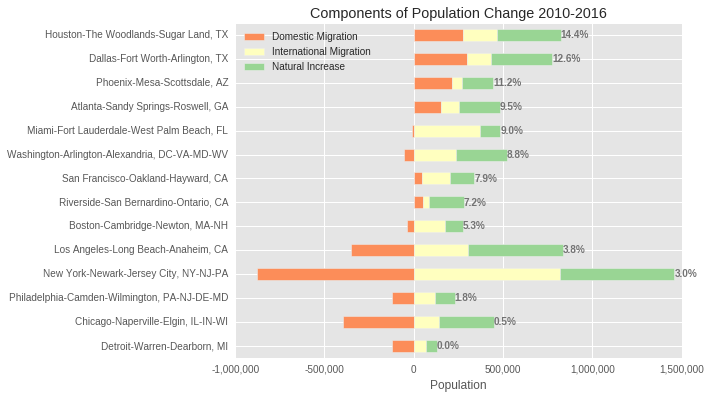

In [33]:
plot_components_of_pop_change(metro_sum, cbrew2, new_index=True, index='NAME')

In [34]:
big_cities=county_pep.loc[cities.keys()]

In [35]:
city_names=pd.DataFrame.from_dict(cities, orient='index')

In [36]:
big_cities=big_cities.merge(city_names, left_index=True, right_index=True, how='left').rename(columns={0:'city_name'})

In [37]:
#Create summary for all 6 years
city_sum=big_cities.groupby('city_name').sum()

city_sum['domestic']=(city_sum.DOMESTICMIG2011 + city_sum.DOMESTICMIG2012 + city_sum.DOMESTICMIG2013 + city_sum.DOMESTICMIG2014
                       + city_sum.DOMESTICMIG2015 + city_sum.DOMESTICMIG2016)
city_sum['international']=(city_sum.INTERNATIONALMIG2011 + city_sum.INTERNATIONALMIG2012 + city_sum.INTERNATIONALMIG2013 
                             + city_sum.INTERNATIONALMIG2014 + city_sum.INTERNATIONALMIG2015 + city_sum.INTERNATIONALMIG2016)
city_sum['natural']=(city_sum.NATURALINC2011 + city_sum.NATURALINC2012 + city_sum.NATURALINC2013 + city_sum.NATURALINC2014
                       + city_sum.NATURALINC2015 + city_sum.NATURALINC2016)

city_sum=pd.DataFrame(city_sum, columns=['domestic','international','natural','CENSUS2010POP','POPESTIMATE2016'])

city_sum['change']=(city_sum.POPESTIMATE2016 - city_sum.CENSUS2010POP)
city_sum['pct_change']=((city_sum.change / city_sum.CENSUS2010POP) *100.0).round(1)

In [38]:
city_sum.sort_values(by=['pct_change'], ascending=False)

,domestic,international,natural,CENSUS2010POP,POPESTIMATE2016,change,pct_change
city_name,,,,,,,
"Bexar Co, TX (San Antonio)",84461,30495,88144,1714773,1928680,213907,12.5
"Harris Co, TX (Houston)",65370,149319,271513,4092459,4589928,497469,12.2
"Maricopa Co, AZ (Phoenix)",192975,54135,162356,3817117,4242997,425880,11.2
"Dallas Co, TX",-1564,63872,144381,2368139,2574984,206845,8.7
"Santa Clara Co, CA (San Jose)",-46470,98300,83964,1781642,1919402,137760,7.7
"San Diego Co, CA",-15397,86774,141733,3095313,3317749,222436,7.2
"New York City, NY",-507265,482691,384491,8175133,8537673,362540,4.4
"Los Angeles Co, CA",-328463,239920,415675,9818605,10137915,319310,3.3
"Philadelphia Co, PA",-60544,53444,49231,1526006,1567872,41866,2.7


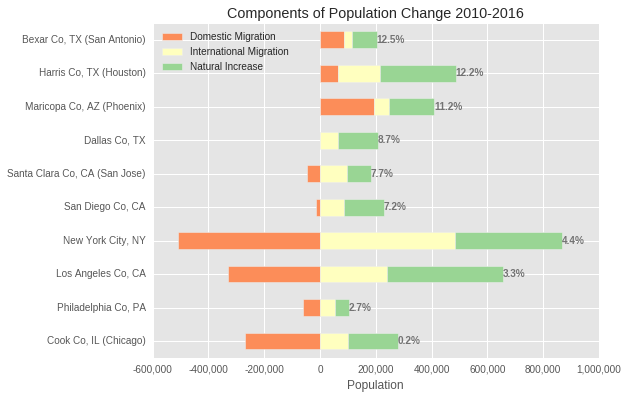

In [39]:
plot_components_of_pop_change(city_sum, cbrew2)